# **Import Required Libraries/Modules**

In [1]:
# Import Libraries
from datetime import datetime #=> date time conversion on dataframe
import datetime as dt
import re

# Dataframe
import pandas as pd
 
# Numerical
import numpy as np
import math
from math import sqrt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


# Evaluating
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

# Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pylab import rcParams
import seaborn as sns 

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

pd.options.mode.chained_assignment = None #https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [2]:
# Define ticker of stock data
ticker = 'SIDO' #2185x7

# **Load Data**

In [3]:
# Load data and conversion date 
df = pd.read_csv(f'C:/Users/Test/Downloads/Thesis/Dataset yahoo/{ticker}.csv')
df['Date'] = pd.to_datetime(df['Date']) 

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-18,337.424103,357.272583,317.575623,347.348328,229.452393,726970648.0
1,2013-12-19,347.348328,357.272583,337.424103,342.386230,226.174515,204189976.0
2,2013-12-20,332.461975,347.348328,332.461975,342.386230,226.174515,55256633.0
3,2013-12-23,332.461975,342.386230,332.461975,342.386230,226.174515,85285134.0
4,2013-12-24,342.386230,347.348328,332.461975,337.424103,222.896637,71950105.0
...,...,...,...,...,...,...,...
2180,2022-09-26,720.000000,725.000000,710.000000,720.000000,720.000000,18423400.0
2181,2022-09-27,720.000000,720.000000,710.000000,715.000000,715.000000,12252800.0
2182,2022-09-28,715.000000,720.000000,710.000000,710.000000,710.000000,9788600.0
2183,2022-09-29,715.000000,715.000000,710.000000,715.000000,715.000000,16856300.0


In [5]:
df.isnull().values.any() #Check NaN

True

In [6]:
df.isnull().sum() #8 rows NaN

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [7]:
df.corr()['Close']

Open         0.999140
High         0.999484
Low          0.999411
Close        1.000000
Adj Close    0.995366
Volume       0.133777
Name: Close, dtype: float64

In [8]:
# Drop NaN Values
df = df.dropna() # Drop menghindari missing values
df #2185-7 = 2177

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-18,337.424103,357.272583,317.575623,347.348328,229.452393,726970648.0
1,2013-12-19,347.348328,357.272583,337.424103,342.386230,226.174515,204189976.0
2,2013-12-20,332.461975,347.348328,332.461975,342.386230,226.174515,55256633.0
3,2013-12-23,332.461975,342.386230,332.461975,342.386230,226.174515,85285134.0
4,2013-12-24,342.386230,347.348328,332.461975,337.424103,222.896637,71950105.0
...,...,...,...,...,...,...,...
2180,2022-09-26,720.000000,725.000000,710.000000,720.000000,720.000000,18423400.0
2181,2022-09-27,720.000000,720.000000,710.000000,715.000000,715.000000,12252800.0
2182,2022-09-28,715.000000,720.000000,710.000000,710.000000,710.000000,9788600.0
2183,2022-09-29,715.000000,715.000000,710.000000,715.000000,715.000000,16856300.0


In [9]:
# Look START and END date of stock price data
start_from = np.min(df['Date'])
end = np.max(df['Date'])
print(f'{start_from} until {end}.')

2013-12-18 00:00:00 until 2022-09-30 00:00:00.


In [10]:
df.corr()['Close'] #After Drop NaN, number same as before

Open         0.999140
High         0.999484
Low          0.999411
Close        1.000000
Adj Close    0.995366
Volume       0.133777
Name: Close, dtype: float64

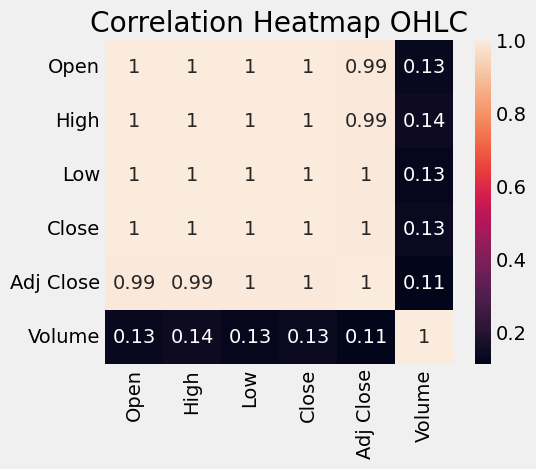

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap OHLC') 
plt.show()  #Drop AdjClose and Volume

In [12]:
ClosePrice = df['Close']
df = df.drop(['Close','Volume'],axis = 1)
df['ClosePrice'] = ClosePrice #CLose Price index = -1
df

,Date,Open,High,Low,Adj Close,ClosePrice
0,2013-12-18,337.424103,357.272583,317.575623,229.452393,347.348328
1,2013-12-19,347.348328,357.272583,337.424103,226.174515,342.386230
2,2013-12-20,332.461975,347.348328,332.461975,226.174515,342.386230
3,2013-12-23,332.461975,342.386230,332.461975,226.174515,342.386230
4,2013-12-24,342.386230,347.348328,332.461975,222.896637,337.424103
...,...,...,...,...,...,...
2180,2022-09-26,720.000000,725.000000,710.000000,720.000000,720.000000
2181,2022-09-27,720.000000,720.000000,710.000000,715.000000,715.000000
2182,2022-09-28,715.000000,720.000000,710.000000,710.000000,710.000000
2183,2022-09-29,715.000000,715.000000,710.000000,715.000000,715.000000


In [13]:
df = df.set_index('Date') #Datetime as index

In [14]:
df #from 2177 x 6 to 2177x5

,Open,High,Low,Adj Close,ClosePrice
Date,,,,,
2013-12-18,337.424103,357.272583,317.575623,229.452393,347.348328
2013-12-19,347.348328,357.272583,337.424103,226.174515,342.386230
2013-12-20,332.461975,347.348328,332.461975,226.174515,342.386230
2013-12-23,332.461975,342.386230,332.461975,226.174515,342.386230
2013-12-24,342.386230,347.348328,332.461975,222.896637,337.424103
...,...,...,...,...,...
2022-09-26,720.000000,725.000000,710.000000,720.000000,720.000000
2022-09-27,720.000000,720.000000,710.000000,715.000000,715.000000
2022-09-28,715.000000,720.000000,710.000000,710.000000,710.000000


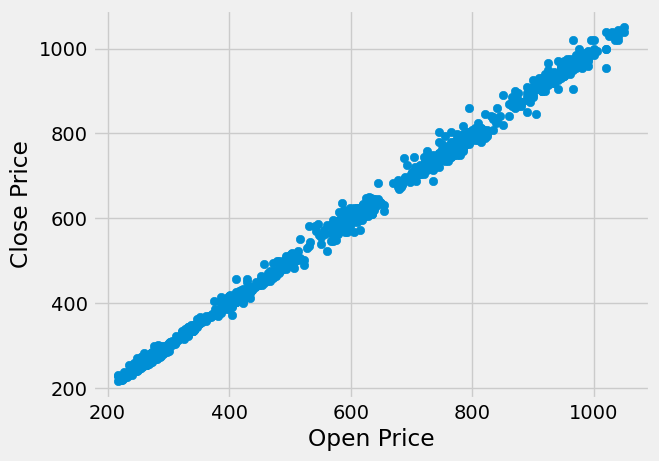

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['Open'], df['ClosePrice'])
plt.xlabel ('Open Price')
plt.ylabel ('Close Price')
plt.show()

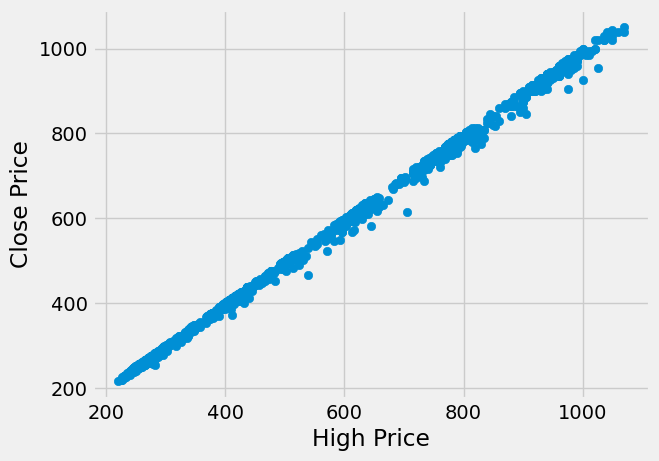

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['High'], df['ClosePrice'])
plt.xlabel ('High Price')
plt.ylabel ('Close Price')
plt.show()

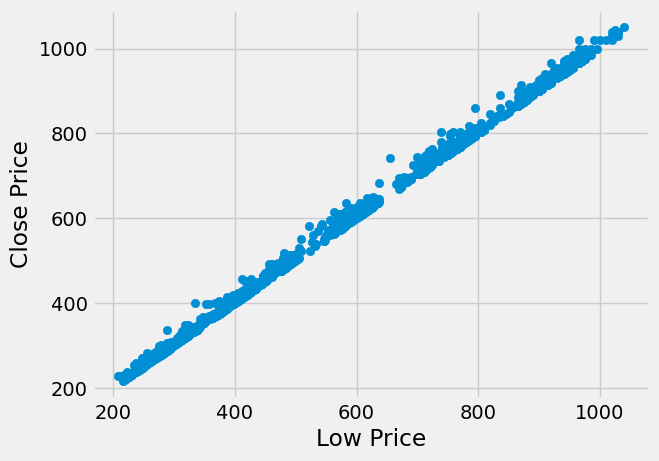

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df['Low'], df['ClosePrice'])
plt.xlabel ('Low Price')
plt.ylabel ('Close Price')
plt.show()

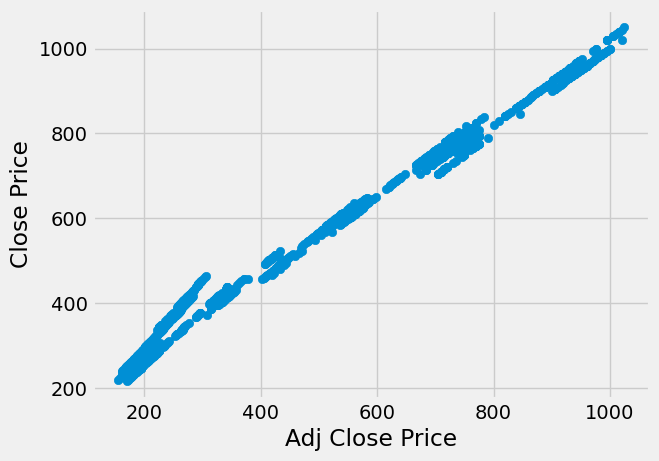

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['Adj Close'], df['ClosePrice'])
plt.xlabel ('Adj Close Price')
plt.ylabel ('Close Price')
plt.show()

In [19]:
df_np = df.to_numpy()
df_np.shape

(2177, 5)

In [20]:
df.shape

(2177, 5)

In [21]:
X_train = df.iloc[: , :4] # X for all rows, and from [0] columns - exclude to [4] columns (Open,High,Low,Close,Adj Close)
y_train = df.iloc[:,-1] # Close price -1 index
X_train.shape, y_train.shape

((2177, 4), (2177,))

In [22]:
#X_train, y_train = df_np[: , :5], df_np[:,-1]    #X for all rows, and from 1st columns - exclude to 6th columns & y Close price -1 index
#X_train.shape, y_train.shape

In [23]:
X_train # X for all rows, and from [0] columns - exclude to [4] columns (Open,High,Low,Close,Adj Close)

,Open,High,Low,Adj Close
Date,,,,
2013-12-18,337.424103,357.272583,317.575623,229.452393
2013-12-19,347.348328,357.272583,337.424103,226.174515
2013-12-20,332.461975,347.348328,332.461975,226.174515
2013-12-23,332.461975,342.386230,332.461975,226.174515
2013-12-24,342.386230,347.348328,332.461975,222.896637
...,...,...,...,...
2022-09-26,720.000000,725.000000,710.000000,720.000000
2022-09-27,720.000000,720.000000,710.000000,715.000000
2022-09-28,715.000000,720.000000,710.000000,710.000000


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
sklearn_model = LinearRegression().fit(X_train,y_train)
sklearn_y_prediction = sklearn_model.predict(X_train)   #to find intercept,ß1, ß2, ß3
sklearn_y_prediction.shape

(2177,)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(sklearn_y_prediction,y_train),mean_squared_error(sklearn_y_prediction,y_train)

(3.725964120354207, 29.926773745850557)

In [27]:
prediction_df = pd.DataFrame ({'Open' : df['Open'],
                               'High' : df['High'],
                               'Low' : df['Low'],
                               'Adj Close' : df['Adj Close'],
                               'Actual Close Price' : df['ClosePrice'],
                               'Predicted Close Price' : sklearn_y_prediction
                              })
prediction_df 

,Open,High,Low,Adj Close,Actual Close Price,Predicted Close Price
Date,,,,,,
2013-12-18,337.424103,357.272583,317.575623,229.452393,347.348328,336.343744
2013-12-19,347.348328,357.272583,337.424103,226.174515,342.386230,345.189616
2013-12-20,332.461975,347.348328,332.461975,226.174515,342.386230,339.730185
2013-12-23,332.461975,342.386230,332.461975,226.174515,342.386230,336.732142
2013-12-24,342.386230,347.348328,332.461975,222.896637,337.424103,337.338673
...,...,...,...,...,...,...
2022-09-26,720.000000,725.000000,710.000000,720.000000,720.000000,718.768695
2022-09-27,720.000000,720.000000,710.000000,715.000000,715.000000,715.502449
2022-09-28,715.000000,720.000000,710.000000,710.000000,710.000000,716.381008


In [28]:
'''
1. Assuming Close Price[i] = alpha + (beta_1 * Open[i]) + (beta_2 * High[i]) + (beta_3 * Low[i]) + (beta_4 * Adj Close[i]) + error
2. Generally y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + (beta_4 * x_4[i]) + error => x is inputs
3. Model y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i]) + (beta_4_hat * x_4[i]) + error
Model means estimate and alpha_hat is interpcept (ada di Microsoft Excel)
'''

'\n1. Assuming Close Price[i] = alpha + (beta_1 * Open[i]) + (beta_2 * High[i]) + (beta_3 * Low[i]) + (beta_4 * Adj Close[i]) + error\n2. Generally y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + (beta_4 * x_4[i]) + error => x is inputs\n3. Model y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i]) + (beta_4_hat * x_4[i]) + error\nModel means estimate and alpha_hat is interpcept (ada di Microsoft Excel)\n'

In [29]:
'''
---- MULAI GAK NGERTI PENGGUNAAN DAN PERKALIAN MATRIX UNTUK FUNCTION
SOurce : https://www.youtube.com/watch?v=KYNuzfn5Fx0
'''

'\n---- MULAI GAK NGERTI PENGGUNAAN DAN PERKALIAN MATRIX UNTUK FUNCTION\nSOurce : https://www.youtube.com/watch?v=KYNuzfn5Fx0\n'

In [30]:
def get_predictions(model, X): #model is dictionary
  '''
  Obtain the predictions for the given model and inputs.

  model: np.array of Floats with shape (p,) of parameters #From dictionary to List
        1st value is alpha_hat
        2nd value is beta_1_hat
        3rd value is beta_2_hat
        4th value is beta_3_hat
  X: np.array of Floats with shape (n, p-1) of inputs
        SEE MODEL y_hat[i]
        n how many rows, datapoints
        p-1 if we see up,4th value is beta_3 hat, because of alpha become p-1
  Returns: np.array of Floats with shape (n,). 
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(new_X, model)

In [31]:
Koefisien dari Excel REGRESI
#5,272282 + (-0.224772) Open + 0.604189 High + 0.566158 Low + 0.04906 Adj Close

In [43]:
test_model = np.array([5.272282 ,-0.224772, 0.604189, 0.566158, 0.04906]) #Alpha hat 1st, beta_hat_1 2nd, ....beta_hat_4 5th (p-1)

In [44]:
get_predictions(test_model, X_train).shape

(2177,)

In [45]:
prediction_df['Test Predictions'] = get_predictions(test_model, X_train) #Add new columns Test Prediction
prediction_df #Ada OHL Adj Close	Actual Close Price	Predicted Close Price 

,Open,High,Low,Adj Close,Actual Close Price,Predicted Close Price,Test Predictions
Date,,,,,,,
2013-12-18,337.424103,357.272583,317.575623,229.452393,347.348328,336.343744,336.343870
2013-12-19,347.348328,357.272583,337.424103,226.174515,342.386230,345.189616,345.189745
2013-12-20,332.461975,347.348328,332.461975,226.174515,342.386230,339.730185,339.730306
2013-12-23,332.461975,342.386230,332.461975,226.174515,342.386230,336.732142,336.732261
2013-12-24,342.386230,347.348328,332.461975,222.896637,337.424103,337.338673,337.338799
...,...,...,...,...,...,...,...
2022-09-26,720.000000,725.000000,710.000000,720.000000,720.000000,718.768695,718.768847
2022-09-27,720.000000,720.000000,710.000000,715.000000,715.000000,715.502449,715.502602
2022-09-28,715.000000,720.000000,710.000000,710.000000,710.000000,716.381008,716.381162


In [46]:
mean_absolute_error(prediction_df['Test Predictions'], y_train)

3.7259692575792958

In [48]:
mean_squared_error(prediction_df['Test Predictions'], y_train)

29.926773765012268

In [ ]:
#ini dari fungsi diatas sklearn sama nilainya
#(3.725964120354207, 29.926773745850557)